In [1]:
from CatanEnv import CatanSetupEnvMask
from sb3_contrib.ppo_mask import MaskablePPO
env = CatanSetupEnvMask()

model = MaskablePPO("MlpPolicy", env, gamma=0.4, verbose=1)
model.learn(50_000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/Users/danieldrummond/Catan/PyCatron/TC2/Client/env/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.action_masks to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.action_masks` for environment variables or `env.get_wrapper_attr('action_masks')` that will search the reminding wrappers.
  logger.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2        |
|    ep_rew_mean     | 12.7     |
| time/              |          |
|    fps             | 879      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 2          |
|    ep_rew_mean          | 14.3       |
| time/                   |            |
|    fps                  | 784        |
|    iterations           | 2          |
|    time_elapsed         | 5          |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.04465828 |
|    clip_fraction        | 0.791      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.68      |
|    explained_variance   | -0.00542   |
|    learning_rate        | 0.0003     |
|   

12.5


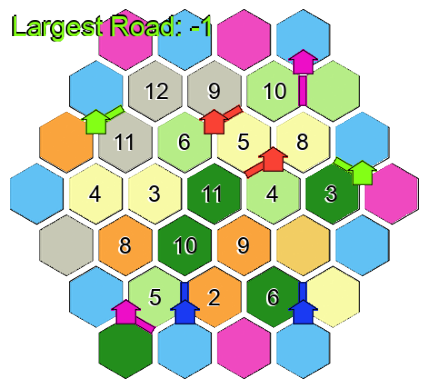

In [35]:
from sb3_contrib.common.maskable.utils import get_action_masks
from GameStateViewer import SaveGameStateImage
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

##############################################################
rewardList = []
rewardList100 = []

for episode in range(1):
    done = False
    state, info = env.reset()

    while done != True:
        action_masks = get_action_masks(env)
        action, _states = model.predict(state, action_masks=action_masks)
        state, reward, done, _, info = env.step(action.item())
        # print(f"Reward: {reward+7}")
        rewardList.append(reward)
    
    SaveGameStateImage(env.game.gameState, "TRAINING.png")

    # if episode % 100 == 0:
    #         rewardList100.append(np.round(np.sum(rewardList[-100:])/100, decimals = 3))
    #         print("episode: {}, Reward: {}\n".format(episode, rewardList100[-1]))
print(sum(rewardList)/len(rewardList))



# plt.plot(rewardList)
# plt.xlabel('Episode (100)')
# plt.ylabel('Avg VP')
# plt.show()

img = mpimg.imread('TRAINING.png')
plt.imshow(img)
plt.axis('off')  # Optional: Remove axes for a clean display
plt.show()